## Data setup 

In [1]:
from fermipy.gtanalysis import GTAnalysis

gta = GTAnalysis('config.yaml',logging={'verbosity' : 3})
gta.setup()

2021-08-09 15:41:45 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version v1.0.1 
ScienceTools version 2.0.8
2021-08-09 15:41:46 INFO    GTAnalysis.setup(): Running setup.
2021-08-09 15:41:46 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2021-08-09 15:41:46 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2021-08-09 15:41:46 INFO    GTBinnedAnalysis._create_ltcube(): Skipping LT Cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:52: FutureWarning: Using a 

## Viewing data after setup

Filename: ccube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   (150, 150, 28)   float32   
  1  EBOUNDS       1 BinTableHDU     22   28R x 4C   [I, E, E, E]   


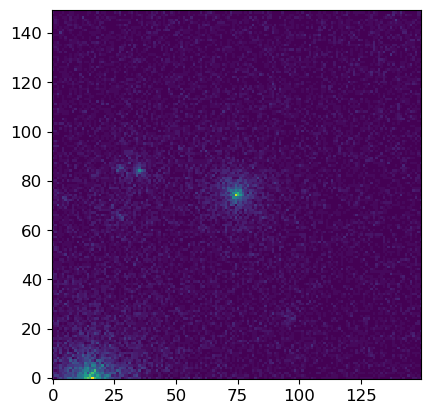

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import astropy.io.fits as pyfits

h = pyfits.open('ccube.fits')
h.info()
counts = h[0].data
counts.shape
plt.figure()
plt.imshow(np.sum(counts,axis=0),interpolation='nearest',origin='lower')
plt.show()

## Optimization


In [3]:
gta.optimize()

2021-08-09 15:42:17 INFO    GTAnalysis.optimize(): Starting


Joint fit  ['isodiff', 'galdiff', '4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007']
Fitting shape 4FGL J1224.9+2122 TS:  10658.661
Fitting shape 4FGL J1159.5+2914 TS:   5864.027
Fitting shape galdiff TS:   2083.259
Fitting shape 4FGL J1217.9+3007 TS:    758.968
Fitting shape isodiff TS:    616.073
Fitting shape 4FGL J1221.5+2814 TS:    383.192
Fitting shape 4FGL J1221.3+3010 TS:    257.630
Fitting shape 4FGL J1231.7+2847 TS:    174.874
Fitting shape 4FGL J1150.4+2418 TS:    155.512
Fitting shape 4FGL J1230.2+2517 TS:     60.140
Fitting shape 4FGL J1225.9+2951 TS:     43.467
Fitting shape 4FGL J1224.4+2436 TS:     37.567
Fitting shape 4FGL J1127.8+3618 TS:     35.690


2021-08-09 15:43:05 INFO    GTAnalysis.optimize(): Finished
2021-08-09 15:43:05 INFO    GTAnalysis.optimize(): LogLike: -70305.147027 Delta-LogLike: 2596.677566
2021-08-09 15:43:05 INFO    GTAnalysis.optimize(): Execution time: 47.68 s


{'loglike0': -72901.82459339792,
 'loglike1': -70305.14702724149,
 'dloglike': 2596.6775661564316,
 'config': {'npred_threshold': 1.0,
  'npred_frac': 0.95,
  'shape_ts_threshold': 25.0,
  'max_free_sources': 5,
  'skip': [],
  'optimizer': {'optimizer': 'MINUIT',
   'tol': 0.001,
   'max_iter': 100,
   'init_lambda': 0.0001,
   'retries': 3,
   'min_fit_quality': 2,
   'verbosity': 0}}}

## Print ROI

In [4]:
gta.print_roi()

2021-08-09 15:43:18 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1159.5+2914   PointSource    LogParabola       0.000   6473.49      3311.3
4FGL J1152.1+2837   PointSource    PowerLaw          1.735      0.22         3.6
4FGL J1208.1+3017   PointSource    PowerLaw          2.132      0.19         4.9
4FGL J1148.5+2629   PointSource    PowerLaw          3.663      0.18        17.7
4FGL J1217.9+3007   PointSource    LogParabola       4.084    735.52       721.6
4FGL J1152.8+3308   PointSource    PowerLaw          4.151      3.69        74.9
4FGL J1205.8+3321   PointSource    PowerLaw          4.324      4.88        64.9
4FGL J1221.3+3010   PointSource    PowerLaw          4.832    270.81       239.4
4FGL J1221.5+2814   PointSource    PowerLaw          4.921    388.54       492.1
4FGL J1149.4+2441   PointSource    PowerLaw          5.0

## Free parameters

In [6]:
gta.free_sources(distance=5.0,pars='norm')

# Free all parameters of isotropic and galactic diffuse components
gta.free_source('galdiff')
gta.free_source('isodiff')

# Bright Source
gta.free_source('4FGL J1224.9+2122')

#Free sources with TS > 10
gta.free_sources(minmax_ts=[10,None],pars='norm')

gta.free_source('Ton 599')


2021-08-09 15:48:12 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1224.9+2122     : ['norm', 'alpha', 'beta']
2021-08-09 15:48:12 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1150.4+2418     : ['Prefactor']
2021-08-09 15:48:12 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1225.9+2951     : ['norm']
2021-08-09 15:48:12 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1220.1+3432     : ['Prefactor']
2021-08-09 15:48:12 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1231.7+2847     : ['Prefactor']
2021-08-09 15:48:12 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1212.0+2242     : ['Prefactor']
2021-08-09 15:48:12 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1224.4+2436     : ['Prefactor']
2021-08-09 15:48:12 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1230.2+2517     : ['norm']
2021-08-09 15:48:12 INFO    GTAnalysis.free_source(): Freeing parameters for 4

## Fitting

In [7]:
gta.fit()

2021-08-09 15:48:25 INFO    GTAnalysis.fit(): Starting fit.
2021-08-09 15:48:36 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2021-08-09 15:48:36 INFO    GTAnalysis.fit(): LogLike:   -70304.449 DeltaLogLike:        0.698 


{'fit_quality': 3,
 'fit_status': 0,
 'fit_success': True,
 'dloglike': 0.6977980638912413,
 'edm': 0.00014405231716146867,
 'loglike': -70304.44922917758,
 'covariance': array([[ 1.00921294e-01,  4.08897448e-03,  1.82403541e-03,
          5.07263781e-04,  9.78449080e-04,  2.89361466e-04,
          2.08252241e-04, -5.07117497e-05,  4.69999752e-03,
          1.07044051e-03,  1.29911192e-02,  2.91797805e-04,
          3.88031870e-03,  5.96556909e-04,  2.32021575e-04,
          1.09059615e-03,  8.78325542e-04,  1.12465936e-04,
         -4.15034725e-05,  1.25173300e-05,  2.55936676e-04,
          6.17489747e-04,  4.58074005e-04, -2.18753193e-04,
         -1.38812778e-03],
        [ 4.08897448e-03,  9.96332992e-02, -1.22613494e-02,
         -4.92350813e-03,  6.91666797e-03, -4.73182719e-04,
         -1.27255752e-03,  4.69475014e-04,  1.15317106e-02,
          2.33900618e-03,  1.33955546e-02,  6.93158708e-04,
          7.05662177e-03,  9.48702364e-04,  4.53623117e-04,
          1.77062264e-0

# Write output model file

In [8]:
gta.write_roi('fit0',make_plots=True)

2021-08-09 15:49:27 INFO    GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/fit0_00.xml...
2021-08-09 15:49:27 INFO    GTAnalysis.write_fits(): Writing /home/paarmita/Desktop/data/fit0.fits...
2021-08-09 15:49:36 INFO    GTAnalysis.write_roi(): Writing /home/paarmita/Desktop/data/fit0.npy...
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/plotting.py:146: MatplotlibDeprecationWarning: Passing raw data via parameters data and lut to register_cmap() is deprecated since 3.3 and will become an error two minor releases later. Instead use: register_cmap(cmap=LinearSegmentedColormap(name, data, lut))
  plt.register_cmap(name='ds9_b', data=ds9_b)
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/plotting.py:301: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of

In [9]:
ls -l *.png

-rw-rw-r-- 1 paarmita paarmita 143408 Aug  9 15:49 fit0_counts_map_2.000_5.477.png
-rw-rw-r-- 1 paarmita paarmita  44646 Aug  9 15:49 fit0_counts_map_xproj_2.000_5.477.png
-rw-rw-r-- 1 paarmita paarmita  40950 Aug  9 15:49 fit0_counts_map_yproj_2.000_5.477.png
-rw-rw-r-- 1 paarmita paarmita 112017 Aug  9 15:49 fit0_counts_spectrum.png
-rw-rw-r-- 1 paarmita paarmita 133259 Aug  9 15:49 fit0_model_map_2.000_5.477.png


In [11]:
import glob
pngs = glob.glob('*.png')

## Display all image results

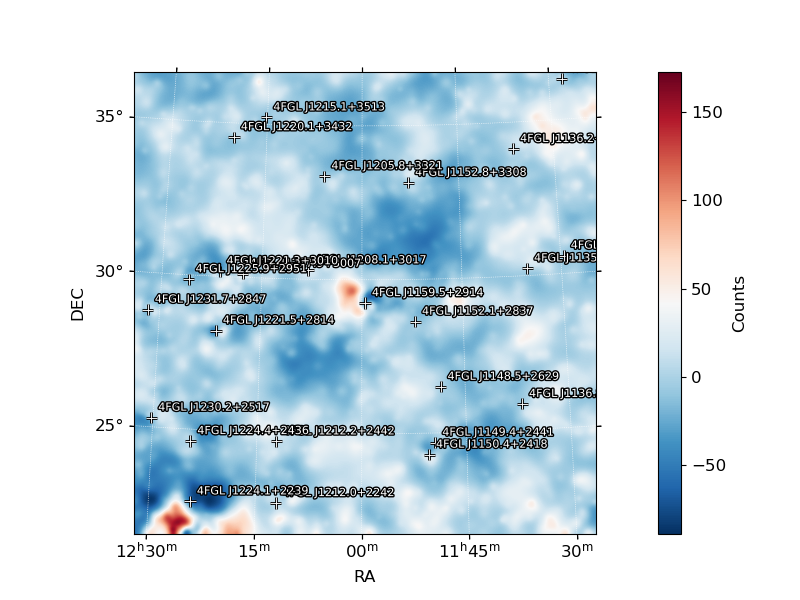

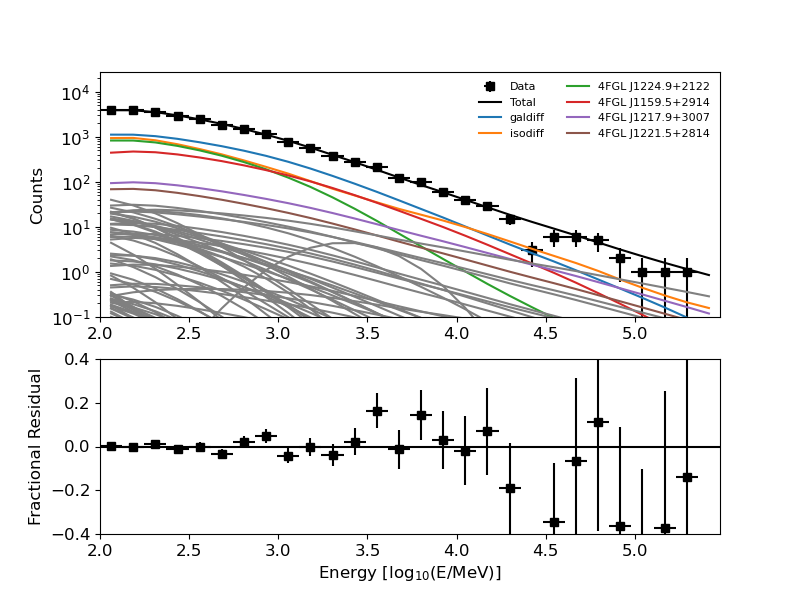

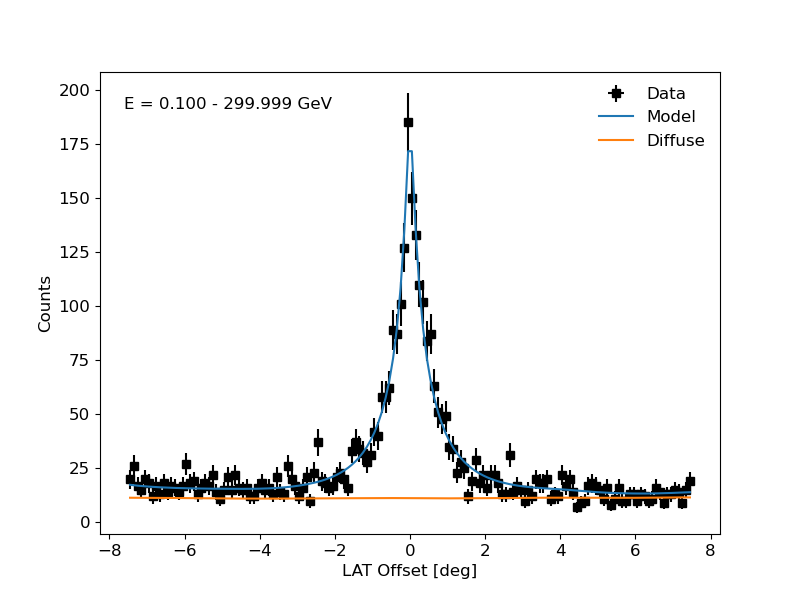

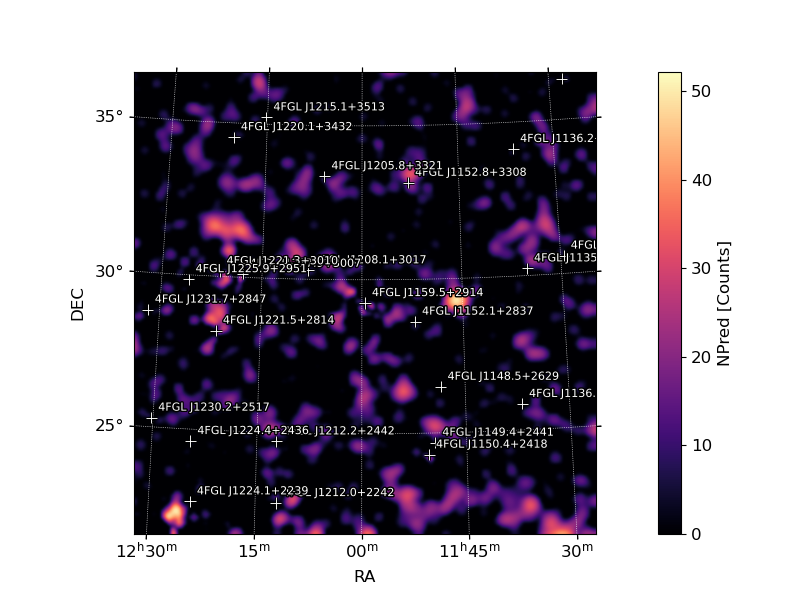

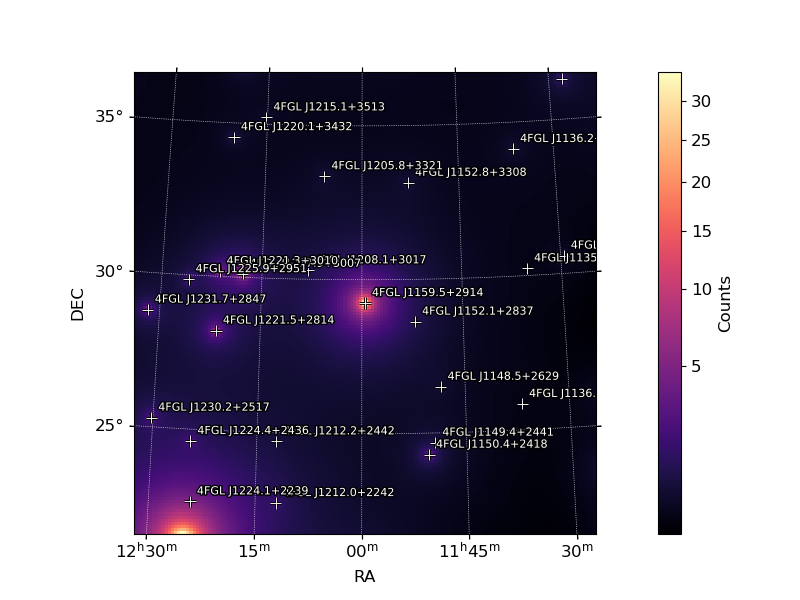

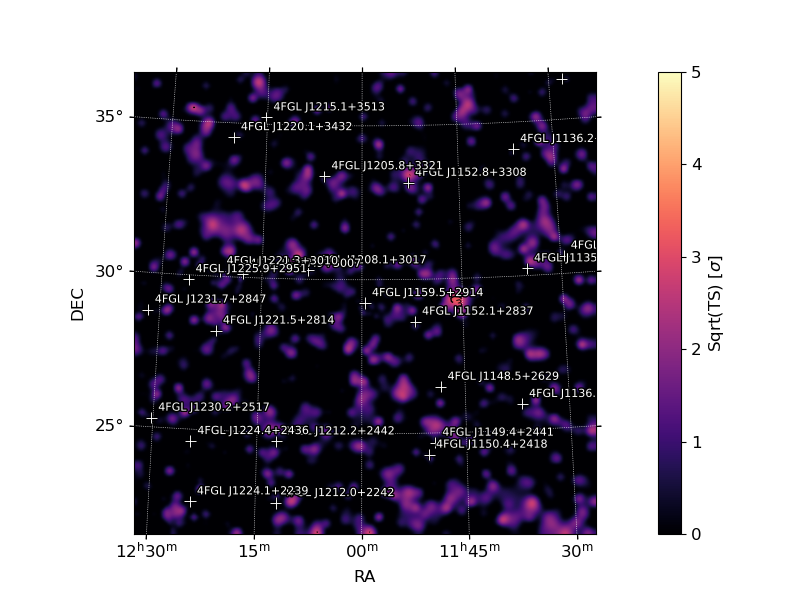

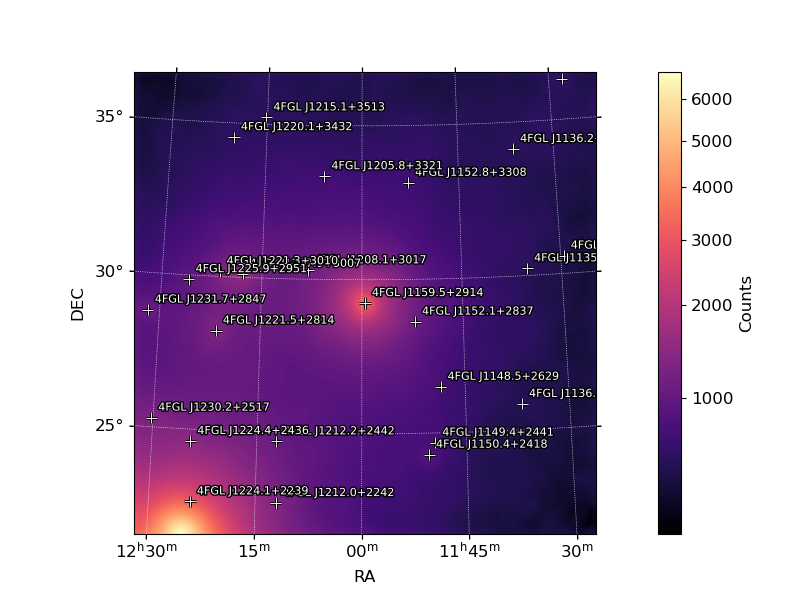

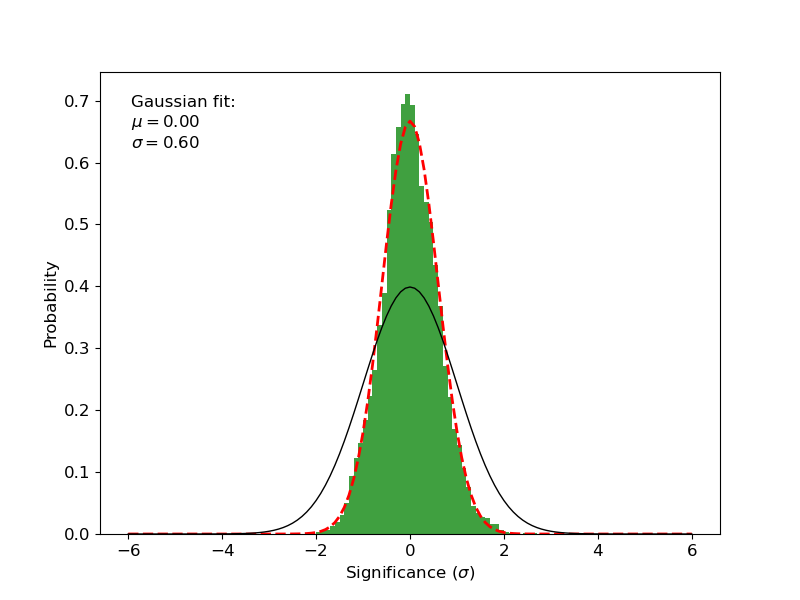

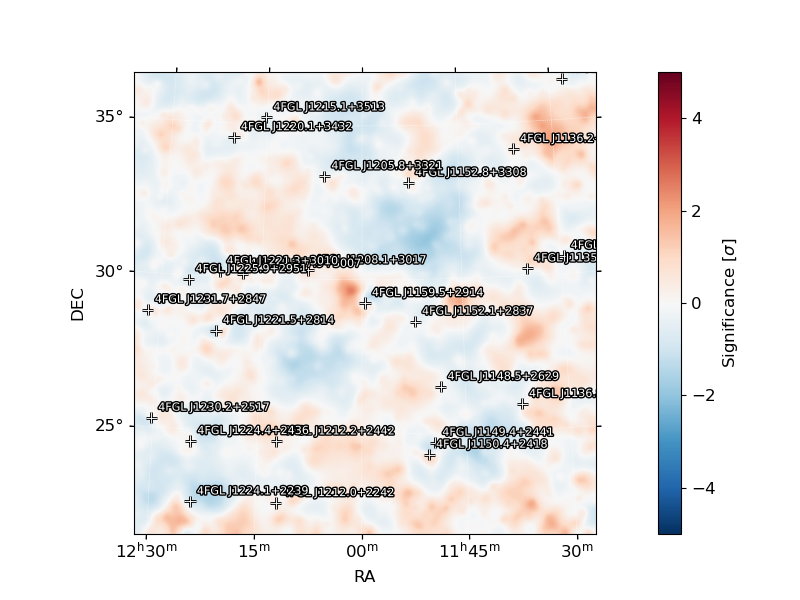

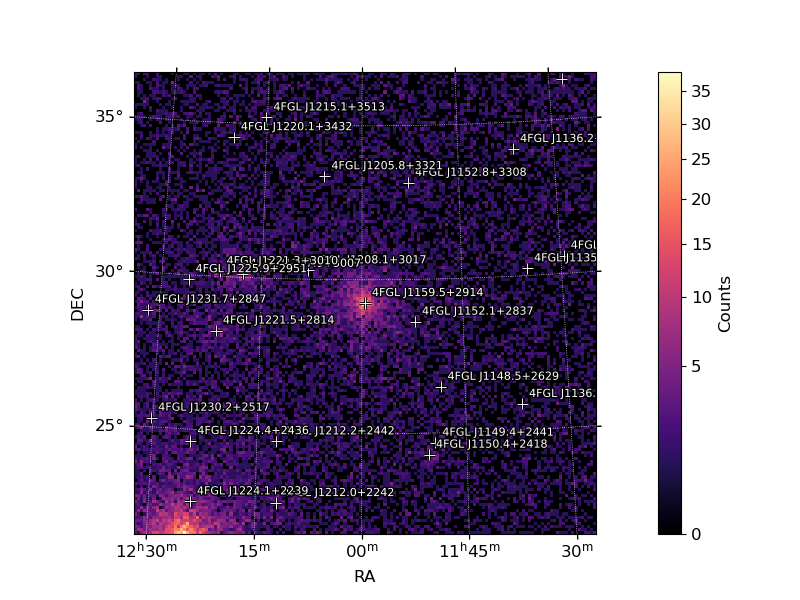

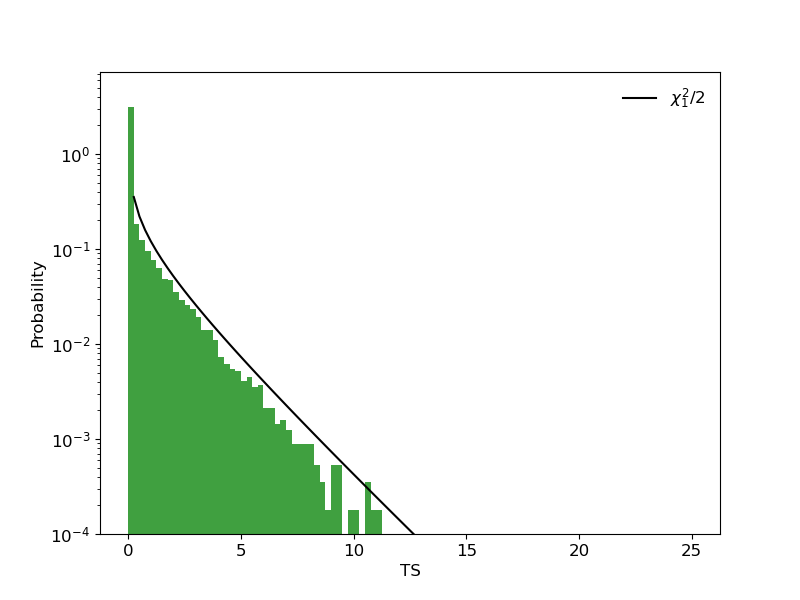

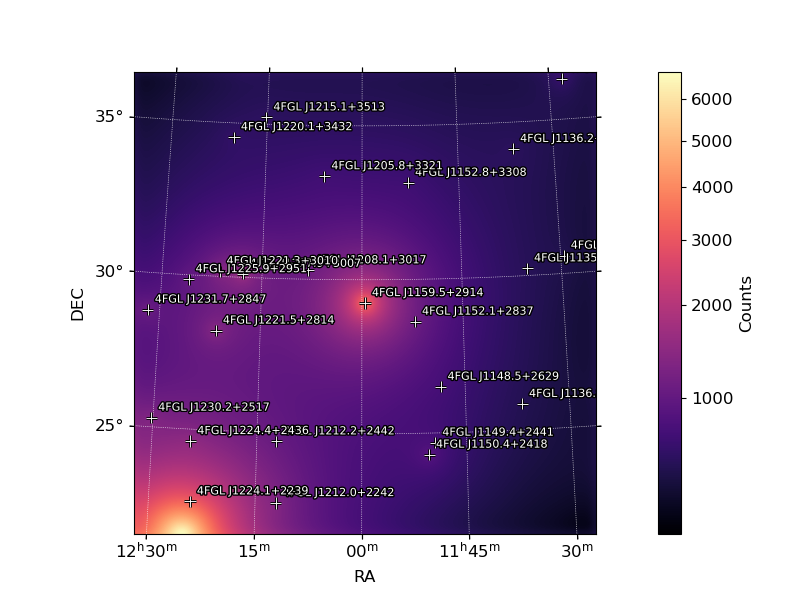

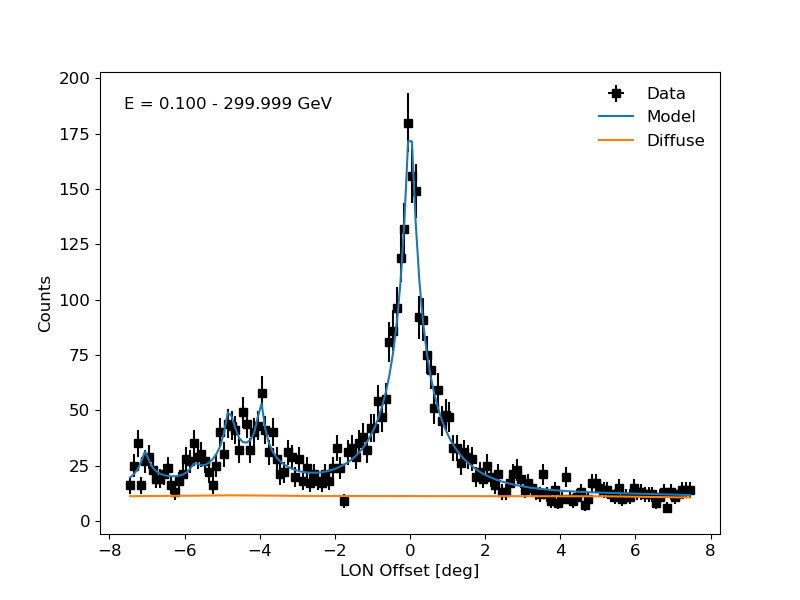

In [13]:
%matplotlib inline
from IPython.display import Image
for png in pngs:
    my_image = Image(png)
    display(my_image)

## TS Map and Residual Map

In [10]:
# Dictionary defining the spatial/spectral parameters of the test source
model = {'SpatialModel' : 'PointSource', 'Index' : 2.0,
         'SpectrumType' : 'PowerLaw'}

# Both methods return a dictionary with the maps
m0 = gta.residmap('fit_model', model=model, make_plots=True)
m1 = gta.tsmap('fit_model', model=model, make_plots=True)


2021-08-09 15:50:20 INFO    GTAnalysis.residmap(): Generating residual maps
2021-08-09 15:50:20 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2021-08-09 15:50:22 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/plotting.py:164: MatplotlibDeprecationWarning: Passing raw data via parameters data and lut to register_cmap() is deprecated since 3.3 and will become an error two minor releases later. Instead use: register_cmap(cmap=LinearSegmentedColormap(name, data, lut))
  plt.register_cmap(name='bluered', data=bluered)
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/plotting.py:146: MatplotlibDeprecationWarning: Passing raw data via parameters data and lut to register_cmap() is deprecated since 3.3 and will become an error two minor releases later. Instead use: register_cmap(cmap=LinearSegmentedColormap(name, data, lut))
  plt.register_cmap(name='ds9_b

2021-08-09 15:50:30 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/paarmita/Desktop/data/fit_model_pointsource_powerlaw_2.00_residmap.npy
2021-08-09 15:50:30 INFO    GTAnalysis.residmap(): Execution time: 9.18 s
2021-08-09 15:50:30 INFO    GTAnalysis.tsmap(): Generating TS map
2021-08-09 15:50:31 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/plotting.py:146: MatplotlibDeprecationWarning: Passing raw data via parameters data and lut to register_cmap() is deprecated since 3.3 and will become an error two minor releases later. Instead use: register_cmap(cmap=LinearSegmentedColormap(name, data, lut))
  plt.register_cmap(name='ds9_b', data=ds9_b)
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/plotting.py:301: MatplotlibDeprecationWarning: You are modifying the state of a globally registered co

## SED Analysis


In [14]:
gta.sed('Ton 599', make_plots=True)

2021-08-09 16:04:05 INFO    GTAnalysis.sed(): Computing SED for 4FGL J1159.5+2914
2021-08-09 16:04:09 INFO    GTAnalysis._make_sed(): Fitting SED
2021-08-09 16:04:09 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1159.5+2914     : ['alpha', 'beta']
2021-08-09 16:04:09 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1224.9+2122     : ['alpha', 'beta']
2021-08-09 16:04:09 INFO    GTAnalysis.free_source(): Fixing parameters for galdiff               : ['Index']
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2021-08-09 16:04:24 INFO    GTAnalysis.sed(): Finished SED
/home/paarmita/anaconda3

{'name': '4FGL J1159.5+2914',
 'loge_min': array([2.     , 2.12418, 2.24837, 2.37255, 2.49673, 2.62091, 2.7451 ,
        2.86928, 2.99346, 3.11765, 3.24183, 3.36601, 3.49019, 3.61438,
        3.73856, 3.86274, 3.98693, 4.11111, 4.23529, 4.35948, 4.48366,
        4.60784, 4.73202, 4.85621, 4.98039, 5.10457, 5.22876, 5.35294]),
 'loge_max': array([2.12418, 2.24837, 2.37255, 2.49673, 2.62091, 2.7451 , 2.86928,
        2.99346, 3.11765, 3.24183, 3.36601, 3.49019, 3.61438, 3.73856,
        3.86274, 3.98693, 4.11111, 4.23529, 4.35948, 4.48366, 4.60784,
        4.73202, 4.85621, 4.98039, 5.10457, 5.22876, 5.35294, 5.47712]),
 'loge_ctr': array([2.06209 , 2.186275, 2.31046 , 2.43464 , 2.55882 , 2.683005,
        2.80719 , 2.93137 , 3.055555, 3.17974 , 3.30392 , 3.4281  ,
        3.552285, 3.67647 , 3.80065 , 3.924835, 4.04902 , 4.1732  ,
        4.297385, 4.42157 , 4.54575 , 4.66993 , 4.794115, 4.9183  ,
        5.04248 , 5.166665, 5.29085 , 5.41503 ]),
 'loge_ref': array([2.06209 , 2.186275, 

## Lightcurve Analysis

In [15]:
lc = gta.lightcurve('Ton 599', binsz=86400.*2.0, use_scaled_srcmap=True)

2021-08-09 16:09:06 INFO    GTAnalysis.lightcurve(): Computing Lightcurve for 4FGL J1159.5+2914
2021-08-09 16:09:07 INFO    lightcurve_297216002_297388802 GTAnalysis._process_lc_bin(): Fitting time range 297216002 297388802
2021-08-09 16:09:08 INFO    lightcurve_297216002_297388802 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:52: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an a

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:    121.897
Fitting shape 4FGL J1224.9+2122 TS:    108.432


2021-08-09 16:09:32 INFO    lightcurve_297216002_297388802 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_297216002_297388802/fit_model_final_00.xml...
2021-08-09 16:09:33 INFO    lightcurve_297216002_297388802 GTAnalysis._process_lc_bin(): Finished time range 297216002 297388802
2021-08-09 16:09:34 INFO    lightcurve_297388802_297561602 GTAnalysis._process_lc_bin(): Fitting time range 297388802 297561602
2021-08-09 16:09:34 INFO    lightcurve_297388802_297561602 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:     77.428
Fitting shape 4FGL J1159.5+2914 TS:     24.283


2021-08-09 16:09:59 INFO    lightcurve_297388802_297561602 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_297388802_297561602/fit_model_final_00.xml...
2021-08-09 16:10:00 INFO    lightcurve_297388802_297561602 GTAnalysis._process_lc_bin(): Finished time range 297388802 297561602
2021-08-09 16:10:01 INFO    lightcurve_297561602_297734402 GTAnalysis._process_lc_bin(): Fitting time range 297561602 297734402
2021-08-09 16:10:01 INFO    lightcurve_297561602_297734402 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:     98.655
Fitting shape 4FGL J1159.5+2914 TS:     60.358


/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2021-08-09 16:10:25 INFO    lightcurve_297561602_297734402 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_297561602_297734402/fit_model_final_00.xml...
2021-08-09 16:10:27 INFO    lightcurve_297561602_297734402 GTAnalysis._process_lc_bin(): Finished time range 297561602 297734402
2021-08-09 16:10:28 INFO    lightcurve_297734402_297907202 GTAnalysis._process_lc_bin(): Fitting time range 297734402 297907202
2021-08-09 16:10:28 INFO    lightcurve_297734402_297907202 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/a

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:    231.325
Fitting shape 4FGL J1159.5+2914 TS:     76.449


2021-08-09 16:10:52 INFO    lightcurve_297734402_297907202 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_297734402_297907202/fit_model_final_00.xml...
2021-08-09 16:10:54 INFO    lightcurve_297734402_297907202 GTAnalysis._process_lc_bin(): Finished time range 297734402 297907202
2021-08-09 16:10:55 INFO    lightcurve_297907202_298080002 GTAnalysis._process_lc_bin(): Fitting time range 297907202 298080002
2021-08-09 16:10:55 INFO    lightcurve_297907202_298080002 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']


/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J1224.9+2122 TS:    459.692
Fitting shape 4FGL J1159.5+2914 TS:     21.096


2021-08-09 16:11:21 INFO    lightcurve_297907202_298080002 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_297907202_298080002/fit_model_final_00.xml...
2021-08-09 16:11:22 INFO    lightcurve_297907202_298080002 GTAnalysis._process_lc_bin(): Finished time range 297907202 298080002
2021-08-09 16:11:24 INFO    lightcurve_298080002_298252802 GTAnalysis._process_lc_bin(): Fitting time range 298080002 298252802
2021-08-09 16:11:24 INFO    lightcurve_298080002_298252802 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']


/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J1224.9+2122 TS:    558.608
Fitting shape 4FGL J1159.5+2914 TS:     58.574


2021-08-09 16:11:48 INFO    lightcurve_298080002_298252802 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_298080002_298252802/fit_model_final_00.xml...
2021-08-09 16:11:49 INFO    lightcurve_298080002_298252802 GTAnalysis._process_lc_bin(): Finished time range 298080002 298252802
2021-08-09 16:11:51 INFO    lightcurve_298252802_298425602 GTAnalysis._process_lc_bin(): Fitting time range 298252802 298425602
2021-08-09 16:11:51 INFO    lightcurve_298252802_298425602 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:    264.659
Fitting shape 4FGL J1159.5+2914 TS:    100.366


2021-08-09 16:12:16 INFO    lightcurve_298252802_298425602 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_298252802_298425602/fit_model_final_00.xml...
2021-08-09 16:12:17 INFO    lightcurve_298252802_298425602 GTAnalysis._process_lc_bin(): Finished time range 298252802 298425602
2021-08-09 16:12:18 INFO    lightcurve_298425602_298598402 GTAnalysis._process_lc_bin(): Fitting time range 298425602 298598402
2021-08-09 16:12:18 INFO    lightcurve_298425602_298598402 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:   1549.397
Fitting shape 4FGL J1159.5+2914 TS:     99.974


2021-08-09 16:12:42 INFO    lightcurve_298425602_298598402 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_298425602_298598402/fit_model_final_00.xml...
2021-08-09 16:12:44 INFO    lightcurve_298425602_298598402 GTAnalysis._process_lc_bin(): Finished time range 298425602 298598402
2021-08-09 16:12:45 INFO    lightcurve_298598402_298771202 GTAnalysis._process_lc_bin(): Fitting time range 298598402 298771202
2021-08-09 16:12:45 INFO    lightcurve_298598402_298771202 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:   1459.609
Fitting shape 4FGL J1159.5+2914 TS:    157.540
Fitting shape 4FGL J1221.3+3010 TS:     28.061


2021-08-09 16:13:10 INFO    lightcurve_298598402_298771202 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_298598402_298771202/fit_model_final_00.xml...
2021-08-09 16:13:11 INFO    lightcurve_298598402_298771202 GTAnalysis._process_lc_bin(): Finished time range 298598402 298771202
2021-08-09 16:13:13 INFO    lightcurve_298771202_298944002 GTAnalysis._process_lc_bin(): Fitting time range 298771202 298944002
2021-08-09 16:13:13 INFO    lightcurve_298771202_298944002 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']


/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J1224.9+2122 TS:    540.348
Fitting shape 4FGL J1159.5+2914 TS:    104.909
Fitting shape 4FGL J1221.5+2814 TS:     20.703
Fitting shape 4FGL J1231.7+2847 TS:     20.030


2021-08-09 16:13:39 INFO    lightcurve_298771202_298944002 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_298771202_298944002/fit_model_final_00.xml...
2021-08-09 16:13:40 INFO    lightcurve_298771202_298944002 GTAnalysis._process_lc_bin(): Finished time range 298771202 298944002
2021-08-09 16:13:42 INFO    lightcurve_298944002_299116802 GTAnalysis._process_lc_bin(): Fitting time range 298944002 299116802
2021-08-09 16:13:42 INFO    lightcurve_298944002_299116802 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:    162.490
Fitting shape 4FGL J1159.5+2914 TS:     93.678


2021-08-09 16:14:08 INFO    lightcurve_298944002_299116802 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_298944002_299116802/fit_model_final_00.xml...
2021-08-09 16:14:09 INFO    lightcurve_298944002_299116802 GTAnalysis._process_lc_bin(): Finished time range 298944002 299116802
2021-08-09 16:14:11 INFO    lightcurve_299116802_299289602 GTAnalysis._process_lc_bin(): Fitting time range 299116802 299289602
2021-08-09 16:14:11 INFO    lightcurve_299116802_299289602 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:    307.030
Fitting shape 4FGL J1159.5+2914 TS:     97.156


2021-08-09 16:14:35 INFO    lightcurve_299116802_299289602 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_299116802_299289602/fit_model_final_00.xml...
2021-08-09 16:14:36 INFO    lightcurve_299116802_299289602 GTAnalysis._process_lc_bin(): Finished time range 299116802 299289602
2021-08-09 16:14:37 INFO    lightcurve_299289602_299462402 GTAnalysis._process_lc_bin(): Fitting time range 299289602 299462402
2021-08-09 16:14:37 INFO    lightcurve_299289602_299462402 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']


/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J1224.9+2122 TS:    446.213
Fitting shape 4FGL J1159.5+2914 TS:    158.175
Fitting shape 4FGL J1221.3+3010 TS:     25.356


2021-08-09 16:15:02 INFO    lightcurve_299289602_299462402 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_299289602_299462402/fit_model_final_00.xml...
2021-08-09 16:15:03 INFO    lightcurve_299289602_299462402 GTAnalysis._process_lc_bin(): Finished time range 299289602 299462402
2021-08-09 16:15:05 INFO    lightcurve_299462402_299635202 GTAnalysis._process_lc_bin(): Fitting time range 299462402 299635202
2021-08-09 16:15:05 INFO    lightcurve_299462402_299635202 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:    627.144
Fitting shape 4FGL J1159.5+2914 TS:    164.255


2021-08-09 16:15:29 INFO    lightcurve_299462402_299635202 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_299462402_299635202/fit_model_final_00.xml...
2021-08-09 16:15:30 INFO    lightcurve_299462402_299635202 GTAnalysis._process_lc_bin(): Finished time range 299462402 299635202
2021-08-09 16:15:32 INFO    lightcurve_299635202_299808002 GTAnalysis._process_lc_bin(): Fitting time range 299635202 299808002
2021-08-09 16:15:32 INFO    lightcurve_299635202_299808002 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']


/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J1224.9+2122 TS:    505.387
Fitting shape 4FGL J1159.5+2914 TS:     86.418
Fitting shape 4FGL J1217.9+3007 TS:     17.366


2021-08-09 16:15:56 INFO    lightcurve_299635202_299808002 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_299635202_299808002/fit_model_final_00.xml...
2021-08-09 16:15:57 INFO    lightcurve_299635202_299808002 GTAnalysis._process_lc_bin(): Finished time range 299635202 299808002
2021-08-09 16:15:58 INFO    lightcurve_299808002_299980802 GTAnalysis._process_lc_bin(): Fitting time range 299808002 299980802
2021-08-09 16:15:58 INFO    lightcurve_299808002_299980802 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:    370.677
Fitting shape 4FGL J1159.5+2914 TS:     46.947


2021-08-09 16:16:23 INFO    lightcurve_299808002_299980802 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_299808002_299980802/fit_model_final_00.xml...
2021-08-09 16:16:24 INFO    lightcurve_299808002_299980802 GTAnalysis._process_lc_bin(): Finished time range 299808002 299980802
2021-08-09 16:16:26 INFO    lightcurve_299980802_300153602 GTAnalysis._process_lc_bin(): Fitting time range 299980802 300153602
2021-08-09 16:16:26 INFO    lightcurve_299980802_300153602 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']


/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J1224.9+2122 TS:    261.674
Fitting shape 4FGL J1159.5+2914 TS:     67.301


2021-08-09 16:16:50 INFO    lightcurve_299980802_300153602 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_299980802_300153602/fit_model_final_00.xml...
2021-08-09 16:16:51 INFO    lightcurve_299980802_300153602 GTAnalysis._process_lc_bin(): Finished time range 299980802 300153602
2021-08-09 16:16:53 INFO    lightcurve_300153602_300326402 GTAnalysis._process_lc_bin(): Fitting time range 300153602 300326402
2021-08-09 16:16:53 INFO    lightcurve_300153602_300326402 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:    366.183
Fitting shape 4FGL J1159.5+2914 TS:     28.867


2021-08-09 16:17:17 INFO    lightcurve_300153602_300326402 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_300153602_300326402/fit_model_final_00.xml...
2021-08-09 16:17:18 INFO    lightcurve_300153602_300326402 GTAnalysis._process_lc_bin(): Finished time range 300153602 300326402
2021-08-09 16:17:20 INFO    lightcurve_300326402_300499202 GTAnalysis._process_lc_bin(): Fitting time range 300326402 300499202
2021-08-09 16:17:20 INFO    lightcurve_300326402_300499202 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']


/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J1224.9+2122 TS:    415.315
Fitting shape 4FGL J1159.5+2914 TS:     18.201


2021-08-09 16:17:44 INFO    lightcurve_300326402_300499202 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_300326402_300499202/fit_model_final_00.xml...
2021-08-09 16:17:45 INFO    lightcurve_300326402_300499202 GTAnalysis._process_lc_bin(): Finished time range 300326402 300499202
2021-08-09 16:17:46 INFO    lightcurve_300499202_300672002 GTAnalysis._process_lc_bin(): Fitting time range 300499202 300672002
2021-08-09 16:17:47 INFO    lightcurve_300499202_300672002 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:    322.408


2021-08-09 16:18:10 INFO    lightcurve_300499202_300672002 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_300499202_300672002/fit_model_final_00.xml...
2021-08-09 16:18:11 INFO    lightcurve_300499202_300672002 GTAnalysis._process_lc_bin(): Finished time range 300499202 300672002
2021-08-09 16:18:12 INFO    lightcurve_300672002_300844802 GTAnalysis._process_lc_bin(): Fitting time range 300672002 300844802
2021-08-09 16:18:13 INFO    lightcurve_300672002_300844802 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:    316.623
Fitting shape 4FGL J1159.5+2914 TS:     18.954
Fitting shape 4FGL J1221.3+3010 TS:     17.368


2021-08-09 16:18:37 INFO    lightcurve_300672002_300844802 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_300672002_300844802/fit_model_final_00.xml...
2021-08-09 16:18:39 INFO    lightcurve_300672002_300844802 GTAnalysis._process_lc_bin(): Finished time range 300672002 300844802
2021-08-09 16:18:40 INFO    lightcurve_300844802_301017602 GTAnalysis._process_lc_bin(): Fitting time range 300844802 301017602
2021-08-09 16:18:40 INFO    lightcurve_300844802_301017602 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:     92.552


2021-08-09 16:19:03 INFO    lightcurve_300844802_301017602 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_300844802_301017602/fit_model_final_00.xml...
2021-08-09 16:19:05 INFO    lightcurve_300844802_301017602 GTAnalysis._process_lc_bin(): Finished time range 300844802 301017602
2021-08-09 16:19:06 INFO    lightcurve_301017602_301190402 GTAnalysis._process_lc_bin(): Fitting time range 301017602 301190402
2021-08-09 16:19:06 INFO    lightcurve_301017602_301190402 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:    130.666
Fitting shape 4FGL J1159.5+2914 TS:     23.960


2021-08-09 16:19:30 INFO    lightcurve_301017602_301190402 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_301017602_301190402/fit_model_final_00.xml...
2021-08-09 16:19:31 INFO    lightcurve_301017602_301190402 GTAnalysis._process_lc_bin(): Finished time range 301017602 301190402
2021-08-09 16:19:33 INFO    lightcurve_301190402_301363202 GTAnalysis._process_lc_bin(): Fitting time range 301190402 301363202
2021-08-09 16:19:33 INFO    lightcurve_301190402_301363202 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:     86.432
Fitting shape 4FGL J1159.5+2914 TS:     38.794
Fitting shape 4FGL J1217.9+3007 TS:     17.824


2021-08-09 16:19:57 INFO    lightcurve_301190402_301363202 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_301190402_301363202/fit_model_final_00.xml...
2021-08-09 16:19:59 INFO    lightcurve_301190402_301363202 GTAnalysis._process_lc_bin(): Finished time range 301190402 301363202
2021-08-09 16:20:00 INFO    lightcurve_301363202_301536002 GTAnalysis._process_lc_bin(): Fitting time range 301363202 301536002
2021-08-09 16:20:00 INFO    lightcurve_301363202_301536002 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:     27.148
Fitting shape 4FGL J1224.9+2122 TS:     20.139


2021-08-09 16:20:24 INFO    lightcurve_301363202_301536002 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_301363202_301536002/fit_model_final_00.xml...
2021-08-09 16:20:25 INFO    lightcurve_301363202_301536002 GTAnalysis._process_lc_bin(): Finished time range 301363202 301536002
2021-08-09 16:20:27 INFO    lightcurve_301536002_301708802 GTAnalysis._process_lc_bin(): Fitting time range 301536002 301708802
2021-08-09 16:20:27 INFO    lightcurve_301536002_301708802 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:     82.651


2021-08-09 16:20:50 INFO    lightcurve_301536002_301708802 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_301536002_301708802/fit_model_final_00.xml...
2021-08-09 16:20:52 INFO    lightcurve_301536002_301708802 GTAnalysis._process_lc_bin(): Finished time range 301536002 301708802
2021-08-09 16:20:53 INFO    lightcurve_301708802_301881602 GTAnalysis._process_lc_bin(): Fitting time range 301708802 301881602
2021-08-09 16:20:53 INFO    lightcurve_301708802_301881602 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']


/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J1224.9+2122 TS:     58.683
Fitting shape 4FGL J1217.9+3007 TS:     18.443


2021-08-09 16:21:17 INFO    lightcurve_301708802_301881602 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_301708802_301881602/fit_model_final_00.xml...
2021-08-09 16:21:19 INFO    lightcurve_301708802_301881602 GTAnalysis._process_lc_bin(): Finished time range 301708802 301881602
2021-08-09 16:21:20 INFO    lightcurve_301881602_302054402 GTAnalysis._process_lc_bin(): Fitting time range 301881602 302054402
2021-08-09 16:21:20 INFO    lightcurve_301881602_302054402 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:     53.124
Fitting shape 4FGL J1221.5+2814 TS:     44.195
Fitting shape 4FGL J1159.5+2914 TS:     16.098


2021-08-09 16:21:44 INFO    lightcurve_301881602_302054402 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_301881602_302054402/fit_model_final_00.xml...
2021-08-09 16:21:46 INFO    lightcurve_301881602_302054402 GTAnalysis._process_lc_bin(): Finished time range 301881602 302054402
2021-08-09 16:21:47 INFO    lightcurve_302054402_302227202 GTAnalysis._process_lc_bin(): Fitting time range 302054402 302227202
2021-08-09 16:21:47 INFO    lightcurve_302054402_302227202 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:     55.931


/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J1221.5+2814 TS:     28.871


2021-08-09 16:22:11 INFO    lightcurve_302054402_302227202 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_302054402_302227202/fit_model_final_00.xml...
2021-08-09 16:22:12 INFO    lightcurve_302054402_302227202 GTAnalysis._process_lc_bin(): Finished time range 302054402 302227202
2021-08-09 16:22:14 INFO    lightcurve_302227202_302400002 GTAnalysis._process_lc_bin(): Fitting time range 302227202 302400002
2021-08-09 16:22:14 INFO    lightcurve_302227202_302400002 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']


/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J1224.9+2122 TS:     49.284
Fitting shape 4FGL J1159.5+2914 TS:     23.255


2021-08-09 16:22:38 INFO    lightcurve_302227202_302400002 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_302227202_302400002/fit_model_final_00.xml...
2021-08-09 16:22:39 INFO    lightcurve_302227202_302400002 GTAnalysis._process_lc_bin(): Finished time range 302227202 302400002
2021-08-09 16:22:40 INFO    lightcurve_302400002_302572802 GTAnalysis._process_lc_bin(): Fitting time range 302400002 302572802
2021-08-09 16:22:40 INFO    lightcurve_302400002_302572802 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:     48.300
Fitting shape 4FGL J1159.5+2914 TS:     27.118


2021-08-09 16:23:04 INFO    lightcurve_302400002_302572802 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_302400002_302572802/fit_model_final_00.xml...
2021-08-09 16:23:05 INFO    lightcurve_302400002_302572802 GTAnalysis._process_lc_bin(): Finished time range 302400002 302572802
2021-08-09 16:23:06 INFO    lightcurve_302572802_302745602 GTAnalysis._process_lc_bin(): Fitting time range 302572802 302745602
2021-08-09 16:23:07 INFO    lightcurve_302572802_302745602 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:     82.698
Fitting shape 4FGL J1217.9+3007 TS:     53.886
Fitting shape 4FGL J1159.5+2914 TS:     35.295


2021-08-09 16:23:31 INFO    lightcurve_302572802_302745602 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_302572802_302745602/fit_model_final_00.xml...
2021-08-09 16:23:32 INFO    lightcurve_302572802_302745602 GTAnalysis._process_lc_bin(): Finished time range 302572802 302745602
2021-08-09 16:23:33 INFO    lightcurve_302745602_302918402 GTAnalysis._process_lc_bin(): Fitting time range 302745602 302918402
2021-08-09 16:23:33 INFO    lightcurve_302745602_302918402 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:     87.154
Fitting shape 4FGL J1159.5+2914 TS:     17.184


2021-08-09 16:23:57 INFO    lightcurve_302745602_302918402 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_302745602_302918402/fit_model_final_00.xml...
2021-08-09 16:23:58 INFO    lightcurve_302745602_302918402 GTAnalysis._process_lc_bin(): Finished time range 302745602 302918402
2021-08-09 16:23:59 INFO    lightcurve_302918402_303091202 GTAnalysis._process_lc_bin(): Fitting time range 302918402 303091202
2021-08-09 16:23:59 INFO    lightcurve_302918402_303091202 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:     79.566
Fitting shape 4FGL J1159.5+2914 TS:     40.119
Fitting shape 4FGL J1221.3+3010 TS:     34.635


2021-08-09 16:24:23 INFO    lightcurve_302918402_303091202 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_302918402_303091202/fit_model_final_00.xml...
2021-08-09 16:24:25 INFO    lightcurve_302918402_303091202 GTAnalysis._process_lc_bin(): Finished time range 302918402 303091202
2021-08-09 16:24:26 INFO    lightcurve_303091202_303264002 GTAnalysis._process_lc_bin(): Fitting time range 303091202 303264002
2021-08-09 16:24:26 INFO    lightcurve_303091202_303264002 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:     39.831
Fitting shape 4FGL J1224.9+2122 TS:     32.445


2021-08-09 16:24:50 INFO    lightcurve_303091202_303264002 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_303091202_303264002/fit_model_final_00.xml...
2021-08-09 16:24:51 INFO    lightcurve_303091202_303264002 GTAnalysis._process_lc_bin(): Finished time range 303091202 303264002
2021-08-09 16:24:52 INFO    lightcurve_303264002_303436802 GTAnalysis._process_lc_bin(): Fitting time range 303264002 303436802
2021-08-09 16:24:52 INFO    lightcurve_303264002_303436802 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:     50.796
Fitting shape 4FGL J1159.5+2914 TS:     27.469


2021-08-09 16:25:16 INFO    lightcurve_303264002_303436802 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_303264002_303436802/fit_model_final_00.xml...
2021-08-09 16:25:17 INFO    lightcurve_303264002_303436802 GTAnalysis._process_lc_bin(): Finished time range 303264002 303436802
2021-08-09 16:25:18 INFO    lightcurve_303436802_303609602 GTAnalysis._process_lc_bin(): Fitting time range 303436802 303609602
2021-08-09 16:25:19 INFO    lightcurve_303436802_303609602 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']


/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J1159.5+2914 TS:    243.620
Fitting shape 4FGL J1224.9+2122 TS:     65.484


2021-08-09 16:25:42 INFO    lightcurve_303436802_303609602 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_303436802_303609602/fit_model_final_00.xml...
2021-08-09 16:25:43 INFO    lightcurve_303436802_303609602 GTAnalysis._process_lc_bin(): Finished time range 303436802 303609602
2021-08-09 16:25:45 INFO    lightcurve_303609602_303782402 GTAnalysis._process_lc_bin(): Fitting time range 303609602 303782402
2021-08-09 16:25:45 INFO    lightcurve_303609602_303782402 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:    288.200


2021-08-09 16:26:08 INFO    lightcurve_303609602_303782402 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_303609602_303782402/fit_model_final_00.xml...
2021-08-09 16:26:09 INFO    lightcurve_303609602_303782402 GTAnalysis._process_lc_bin(): Finished time range 303609602 303782402
2021-08-09 16:26:11 INFO    lightcurve_303782402_303955202 GTAnalysis._process_lc_bin(): Fitting time range 303782402 303955202
2021-08-09 16:26:11 INFO    lightcurve_303782402_303955202 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:    381.170
Fitting shape 4FGL J1224.9+2122 TS:     56.275


2021-08-09 16:26:35 INFO    lightcurve_303782402_303955202 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_303782402_303955202/fit_model_final_00.xml...
2021-08-09 16:26:36 INFO    lightcurve_303782402_303955202 GTAnalysis._process_lc_bin(): Finished time range 303782402 303955202
2021-08-09 16:26:38 INFO    lightcurve_303955202_304128002 GTAnalysis._process_lc_bin(): Fitting time range 303955202 304128002
2021-08-09 16:26:38 INFO    lightcurve_303955202_304128002 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:    307.084
Fitting shape 4FGL J1224.9+2122 TS:     42.402


2021-08-09 16:27:02 INFO    lightcurve_303955202_304128002 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_303955202_304128002/fit_model_final_00.xml...
2021-08-09 16:27:03 INFO    lightcurve_303955202_304128002 GTAnalysis._process_lc_bin(): Finished time range 303955202 304128002
2021-08-09 16:27:04 INFO    lightcurve_304128002_304300802 GTAnalysis._process_lc_bin(): Fitting time range 304128002 304300802
2021-08-09 16:27:05 INFO    lightcurve_304128002_304300802 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:    173.534
Fitting shape 4FGL J1224.9+2122 TS:     55.018


2021-08-09 16:27:28 INFO    lightcurve_304128002_304300802 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_304128002_304300802/fit_model_final_00.xml...
2021-08-09 16:27:30 INFO    lightcurve_304128002_304300802 GTAnalysis._process_lc_bin(): Finished time range 304128002 304300802
2021-08-09 16:27:31 INFO    lightcurve_304300802_304473602 GTAnalysis._process_lc_bin(): Fitting time range 304300802 304473602
2021-08-09 16:27:31 INFO    lightcurve_304300802_304473602 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']


/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J1159.5+2914 TS:    522.647
Fitting shape 4FGL J1217.9+3007 TS:     29.213
Fitting shape 4FGL J1224.9+2122 TS:     28.854


2021-08-09 16:27:56 INFO    lightcurve_304300802_304473602 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_304300802_304473602/fit_model_final_00.xml...
2021-08-09 16:27:57 INFO    lightcurve_304300802_304473602 GTAnalysis._process_lc_bin(): Finished time range 304300802 304473602
2021-08-09 16:27:58 INFO    lightcurve_304473602_304646402 GTAnalysis._process_lc_bin(): Fitting time range 304473602 304646402
2021-08-09 16:27:58 INFO    lightcurve_304473602_304646402 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']


/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J1159.5+2914 TS:    332.574
Fitting shape 4FGL J1224.9+2122 TS:     61.494
Fitting shape 4FGL J1217.9+3007 TS:     38.987


2021-08-09 16:28:22 INFO    lightcurve_304473602_304646402 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_304473602_304646402/fit_model_final_00.xml...
2021-08-09 16:28:23 INFO    lightcurve_304473602_304646402 GTAnalysis._process_lc_bin(): Finished time range 304473602 304646402
2021-08-09 16:28:25 INFO    lightcurve_304646402_304819202 GTAnalysis._process_lc_bin(): Fitting time range 304646402 304819202
2021-08-09 16:28:25 INFO    lightcurve_304646402_304819202 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:    213.691
Fitting shape 4FGL J1224.9+2122 TS:    112.263
Fitting shape 4FGL J1217.9+3007 TS:     32.756


2021-08-09 16:28:48 INFO    lightcurve_304646402_304819202 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_304646402_304819202/fit_model_final_00.xml...
2021-08-09 16:28:49 INFO    lightcurve_304646402_304819202 GTAnalysis._process_lc_bin(): Finished time range 304646402 304819202
2021-08-09 16:28:51 INFO    lightcurve_304819202_304992002 GTAnalysis._process_lc_bin(): Fitting time range 304819202 304992002
2021-08-09 16:28:51 INFO    lightcurve_304819202_304992002 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:    187.046
Fitting shape 4FGL J1224.9+2122 TS:     75.042


2021-08-09 16:29:15 INFO    lightcurve_304819202_304992002 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_304819202_304992002/fit_model_final_00.xml...
2021-08-09 16:29:16 INFO    lightcurve_304819202_304992002 GTAnalysis._process_lc_bin(): Finished time range 304819202 304992002
2021-08-09 16:29:18 INFO    lightcurve_304992002_305164802 GTAnalysis._process_lc_bin(): Fitting time range 304992002 305164802
2021-08-09 16:29:18 INFO    lightcurve_304992002_305164802 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:    138.857
Fitting shape 4FGL J1224.9+2122 TS:    104.062
Fitting shape 4FGL J1221.5+2814 TS:     18.655


2021-08-09 16:29:42 INFO    lightcurve_304992002_305164802 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_304992002_305164802/fit_model_final_00.xml...
2021-08-09 16:29:43 INFO    lightcurve_304992002_305164802 GTAnalysis._process_lc_bin(): Finished time range 304992002 305164802
2021-08-09 16:29:45 INFO    lightcurve_305164802_305337602 GTAnalysis._process_lc_bin(): Fitting time range 305164802 305337602
2021-08-09 16:29:45 INFO    lightcurve_305164802_305337602 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:    207.510
Fitting shape 4FGL J1224.9+2122 TS:     87.120


2021-08-09 16:30:09 INFO    lightcurve_305164802_305337602 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_305164802_305337602/fit_model_final_00.xml...
2021-08-09 16:30:10 INFO    lightcurve_305164802_305337602 GTAnalysis._process_lc_bin(): Finished time range 305164802 305337602
2021-08-09 16:30:11 INFO    lightcurve_305337602_305510402 GTAnalysis._process_lc_bin(): Fitting time range 305337602 305510402
2021-08-09 16:30:12 INFO    lightcurve_305337602_305510402 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:    203.753
Fitting shape 4FGL J1224.9+2122 TS:     53.727
Fitting shape 4FGL J1221.5+2814 TS:     18.929


2021-08-09 16:30:36 INFO    lightcurve_305337602_305510402 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_305337602_305510402/fit_model_final_00.xml...
2021-08-09 16:30:37 INFO    lightcurve_305337602_305510402 GTAnalysis._process_lc_bin(): Finished time range 305337602 305510402
2021-08-09 16:30:39 INFO    lightcurve_305510402_305683202 GTAnalysis._process_lc_bin(): Fitting time range 305510402 305683202
2021-08-09 16:30:39 INFO    lightcurve_305510402_305683202 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:    158.562
Fitting shape 4FGL J1224.9+2122 TS:    106.105
Fitting shape 4FGL J1217.9+3007 TS:     20.621


2021-08-09 16:31:03 INFO    lightcurve_305510402_305683202 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_305510402_305683202/fit_model_final_00.xml...
2021-08-09 16:31:05 INFO    lightcurve_305510402_305683202 GTAnalysis._process_lc_bin(): Finished time range 305510402 305683202
2021-08-09 16:31:06 INFO    lightcurve_305683202_305856002 GTAnalysis._process_lc_bin(): Fitting time range 305683202 305856002
2021-08-09 16:31:06 INFO    lightcurve_305683202_305856002 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:     99.059
Fitting shape 4FGL J1224.9+2122 TS:     31.342


2021-08-09 16:31:29 INFO    lightcurve_305683202_305856002 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_305683202_305856002/fit_model_final_00.xml...
2021-08-09 16:31:31 INFO    lightcurve_305683202_305856002 GTAnalysis._process_lc_bin(): Finished time range 305683202 305856002
2021-08-09 16:31:32 INFO    lightcurve_305856002_306028802 GTAnalysis._process_lc_bin(): Fitting time range 305856002 306028802
2021-08-09 16:31:32 INFO    lightcurve_305856002_306028802 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:     75.612
Fitting shape 4FGL J1159.5+2914 TS:     42.797


2021-08-09 16:31:56 INFO    lightcurve_305856002_306028802 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_305856002_306028802/fit_model_final_00.xml...
2021-08-09 16:31:57 INFO    lightcurve_305856002_306028802 GTAnalysis._process_lc_bin(): Finished time range 305856002 306028802
2021-08-09 16:31:58 INFO    lightcurve_306028802_306201602 GTAnalysis._process_lc_bin(): Fitting time range 306028802 306201602
2021-08-09 16:31:58 INFO    lightcurve_306028802_306201602 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:     57.248
Fitting shape 4FGL J1217.9+3007 TS:     56.252
Fitting shape 4FGL J1224.9+2122 TS:     45.955


/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2021-08-09 16:32:22 INFO    lightcurve_306028802_306201602 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_306028802_306201602/fit_model_final_00.xml...
2021-08-09 16:32:23 INFO    lightcurve_306028802_306201602 GTAnalysis._process_lc_bin(): Finished time range 306028802 306201602
2021-08-09 16:32:25 INFO    lightcurve_306201602_306374402 GTAnalysis._process_lc_bin(): Fitting time range 306201602 306374402
2021-08-09 16:32:25 INFO    lightcurve_306201602_306374402 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/a

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']


/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J1224.9+2122 TS:     97.664
Fitting shape 4FGL J1159.5+2914 TS:     62.328
Fitting shape 4FGL J1221.5+2814 TS:     36.022


2021-08-09 16:32:49 INFO    lightcurve_306201602_306374402 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_306201602_306374402/fit_model_final_00.xml...
2021-08-09 16:32:50 INFO    lightcurve_306201602_306374402 GTAnalysis._process_lc_bin(): Finished time range 306201602 306374402
2021-08-09 16:32:52 INFO    lightcurve_306374402_306547202 GTAnalysis._process_lc_bin(): Fitting time range 306374402 306547202
2021-08-09 16:32:52 INFO    lightcurve_306374402_306547202 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:     59.036


2021-08-09 16:33:15 INFO    lightcurve_306374402_306547202 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_306374402_306547202/fit_model_final_00.xml...
2021-08-09 16:33:16 INFO    lightcurve_306374402_306547202 GTAnalysis._process_lc_bin(): Finished time range 306374402 306547202
2021-08-09 16:33:18 INFO    lightcurve_306547202_306720002 GTAnalysis._process_lc_bin(): Fitting time range 306547202 306720002
2021-08-09 16:33:18 INFO    lightcurve_306547202_306720002 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:     43.646
Fitting shape 4FGL J1224.9+2122 TS:     27.586
Fitting shape 4FGL J1217.9+3007 TS:     18.134


2021-08-09 16:33:42 INFO    lightcurve_306547202_306720002 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_306547202_306720002/fit_model_final_00.xml...
2021-08-09 16:33:43 INFO    lightcurve_306547202_306720002 GTAnalysis._process_lc_bin(): Finished time range 306547202 306720002
2021-08-09 16:33:44 INFO    lightcurve_306720002_306892802 GTAnalysis._process_lc_bin(): Fitting time range 306720002 306892802
2021-08-09 16:33:45 INFO    lightcurve_306720002_306892802 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:     50.918
Fitting shape 4FGL J1217.9+3007 TS:     33.072
Fitting shape 4FGL J1159.5+2914 TS:     24.786


2021-08-09 16:34:08 INFO    lightcurve_306720002_306892802 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_306720002_306892802/fit_model_final_00.xml...
2021-08-09 16:34:10 INFO    lightcurve_306720002_306892802 GTAnalysis._process_lc_bin(): Finished time range 306720002 306892802
2021-08-09 16:34:11 INFO    lightcurve_306892802_307065602 GTAnalysis._process_lc_bin(): Fitting time range 306892802 307065602
2021-08-09 16:34:11 INFO    lightcurve_306892802_307065602 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:     45.726
Fitting shape 4FGL J1159.5+2914 TS:     42.458


2021-08-09 16:34:34 INFO    lightcurve_306892802_307065602 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_306892802_307065602/fit_model_final_00.xml...
2021-08-09 16:34:35 INFO    lightcurve_306892802_307065602 GTAnalysis._process_lc_bin(): Finished time range 306892802 307065602
2021-08-09 16:34:36 INFO    lightcurve_307065602_307238402 GTAnalysis._process_lc_bin(): Fitting time range 307065602 307238402
2021-08-09 16:34:36 INFO    lightcurve_307065602_307238402 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:     54.843
Fitting shape 4FGL J1224.9+2122 TS:     36.509


2021-08-09 16:34:58 INFO    lightcurve_307065602_307238402 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_307065602_307238402/fit_model_final_00.xml...
2021-08-09 16:35:00 INFO    lightcurve_307065602_307238402 GTAnalysis._process_lc_bin(): Finished time range 307065602 307238402
2021-08-09 16:35:01 INFO    lightcurve_307238402_307411202 GTAnalysis._process_lc_bin(): Fitting time range 307238402 307411202
2021-08-09 16:35:01 INFO    lightcurve_307238402_307411202 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:     45.916


2021-08-09 16:35:23 INFO    lightcurve_307238402_307411202 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_307238402_307411202/fit_model_final_00.xml...
2021-08-09 16:35:24 INFO    lightcurve_307238402_307411202 GTAnalysis._process_lc_bin(): Finished time range 307238402 307411202
2021-08-09 16:35:26 INFO    lightcurve_307411202_307584002 GTAnalysis._process_lc_bin(): Fitting time range 307411202 307584002
2021-08-09 16:35:26 INFO    lightcurve_307411202_307584002 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:     99.342
Fitting shape 4FGL J1224.9+2122 TS:     22.901


2021-08-09 16:35:49 INFO    lightcurve_307411202_307584002 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_307411202_307584002/fit_model_final_00.xml...
2021-08-09 16:35:50 INFO    lightcurve_307411202_307584002 GTAnalysis._process_lc_bin(): Finished time range 307411202 307584002
2021-08-09 16:35:52 INFO    lightcurve_307584002_307756802 GTAnalysis._process_lc_bin(): Fitting time range 307584002 307756802
2021-08-09 16:35:52 INFO    lightcurve_307584002_307756802 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:     85.650
Fitting shape 4FGL J1224.9+2122 TS:     35.263
Fitting shape 4FGL J1217.9+3007 TS:     22.204


2021-08-09 16:36:16 INFO    lightcurve_307584002_307756802 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_307584002_307756802/fit_model_final_00.xml...
2021-08-09 16:36:17 INFO    lightcurve_307584002_307756802 GTAnalysis._process_lc_bin(): Finished time range 307584002 307756802
2021-08-09 16:36:18 INFO    lightcurve_307756802_307929602 GTAnalysis._process_lc_bin(): Fitting time range 307756802 307929602
2021-08-09 16:36:19 INFO    lightcurve_307756802_307929602 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:    102.730


2021-08-09 16:36:41 INFO    lightcurve_307756802_307929602 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_307756802_307929602/fit_model_final_00.xml...
2021-08-09 16:36:42 INFO    lightcurve_307756802_307929602 GTAnalysis._process_lc_bin(): Finished time range 307756802 307929602
2021-08-09 16:36:44 INFO    lightcurve_307929602_308102402 GTAnalysis._process_lc_bin(): Fitting time range 307929602 308102402
2021-08-09 16:36:44 INFO    lightcurve_307929602_308102402 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']


/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J1159.5+2914 TS:     67.296


2021-08-09 16:37:06 INFO    lightcurve_307929602_308102402 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_307929602_308102402/fit_model_final_00.xml...
2021-08-09 16:37:07 INFO    lightcurve_307929602_308102402 GTAnalysis._process_lc_bin(): Finished time range 307929602 308102402
2021-08-09 16:37:09 INFO    lightcurve_308102402_308275202 GTAnalysis._process_lc_bin(): Fitting time range 308102402 308275202
2021-08-09 16:37:09 INFO    lightcurve_308102402_308275202 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:     90.302
Fitting shape 4FGL J1224.9+2122 TS:     73.748


2021-08-09 16:37:32 INFO    lightcurve_308102402_308275202 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_308102402_308275202/fit_model_final_00.xml...
2021-08-09 16:37:33 INFO    lightcurve_308102402_308275202 GTAnalysis._process_lc_bin(): Finished time range 308102402 308275202
2021-08-09 16:37:35 INFO    lightcurve_308275202_308448002 GTAnalysis._process_lc_bin(): Fitting time range 308275202 308448002
2021-08-09 16:37:35 INFO    lightcurve_308275202_308448002 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:    125.451
Fitting shape 4FGL J1159.5+2914 TS:     91.381


2021-08-09 16:37:59 INFO    lightcurve_308275202_308448002 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_308275202_308448002/fit_model_final_00.xml...
2021-08-09 16:38:00 INFO    lightcurve_308275202_308448002 GTAnalysis._process_lc_bin(): Finished time range 308275202 308448002
2021-08-09 16:38:02 INFO    lightcurve_308448002_308620802 GTAnalysis._process_lc_bin(): Fitting time range 308448002 308620802
2021-08-09 16:38:02 INFO    lightcurve_308448002_308620802 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:    232.378
Fitting shape 4FGL J1159.5+2914 TS:     45.387
Fitting shape 4FGL J1221.3+3010 TS:     16.066


2021-08-09 16:38:26 INFO    lightcurve_308448002_308620802 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_308448002_308620802/fit_model_final_00.xml...
2021-08-09 16:38:27 INFO    lightcurve_308448002_308620802 GTAnalysis._process_lc_bin(): Finished time range 308448002 308620802
2021-08-09 16:38:28 INFO    lightcurve_308620802_308793602 GTAnalysis._process_lc_bin(): Fitting time range 308620802 308793602
2021-08-09 16:38:29 INFO    lightcurve_308620802_308793602 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:    154.007
Fitting shape 4FGL J1159.5+2914 TS:     47.816


2021-08-09 16:38:52 INFO    lightcurve_308620802_308793602 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_308620802_308793602/fit_model_final_00.xml...
2021-08-09 16:38:53 INFO    lightcurve_308620802_308793602 GTAnalysis._process_lc_bin(): Finished time range 308620802 308793602
2021-08-09 16:38:55 INFO    lightcurve_308793602_308966402 GTAnalysis._process_lc_bin(): Fitting time range 308793602 308966402
2021-08-09 16:38:55 INFO    lightcurve_308793602_308966402 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']


/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J1224.9+2122 TS:    430.714
Fitting shape 4FGL J1159.5+2914 TS:     51.065
Fitting shape 4FGL J1221.3+3010 TS:     21.142


2021-08-09 16:39:19 INFO    lightcurve_308793602_308966402 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_308793602_308966402/fit_model_final_00.xml...
2021-08-09 16:39:21 INFO    lightcurve_308793602_308966402 GTAnalysis._process_lc_bin(): Finished time range 308793602 308966402
2021-08-09 16:39:22 INFO    lightcurve_308966402_309139202 GTAnalysis._process_lc_bin(): Fitting time range 308966402 309139202
2021-08-09 16:39:22 INFO    lightcurve_308966402_309139202 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:    129.563
Fitting shape 4FGL J1159.5+2914 TS:     44.336


2021-08-09 16:39:46 INFO    lightcurve_308966402_309139202 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_308966402_309139202/fit_model_final_00.xml...
2021-08-09 16:39:47 INFO    lightcurve_308966402_309139202 GTAnalysis._process_lc_bin(): Finished time range 308966402 309139202
2021-08-09 16:39:49 INFO    lightcurve_309139202_309312002 GTAnalysis._process_lc_bin(): Fitting time range 309139202 309312002
2021-08-09 16:39:49 INFO    lightcurve_309139202_309312002 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:    186.360
Fitting shape 4FGL J1159.5+2914 TS:     48.366


2021-08-09 16:40:13 INFO    lightcurve_309139202_309312002 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_309139202_309312002/fit_model_final_00.xml...
2021-08-09 16:40:14 INFO    lightcurve_309139202_309312002 GTAnalysis._process_lc_bin(): Finished time range 309139202 309312002
2021-08-09 16:40:15 INFO    lightcurve_309312002_309484802 GTAnalysis._process_lc_bin(): Fitting time range 309312002 309484802
2021-08-09 16:40:16 INFO    lightcurve_309312002_309484802 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']


/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J1224.9+2122 TS:     66.846
Fitting shape 4FGL J1159.5+2914 TS:     27.594


2021-08-09 16:40:40 INFO    lightcurve_309312002_309484802 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_309312002_309484802/fit_model_final_00.xml...
2021-08-09 16:40:41 INFO    lightcurve_309312002_309484802 GTAnalysis._process_lc_bin(): Finished time range 309312002 309484802
2021-08-09 16:40:42 INFO    lightcurve_309484802_309657602 GTAnalysis._process_lc_bin(): Fitting time range 309484802 309657602
2021-08-09 16:40:42 INFO    lightcurve_309484802_309657602 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:     48.275
Fitting shape 4FGL J1159.5+2914 TS:     39.517


2021-08-09 16:41:05 INFO    lightcurve_309484802_309657602 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_309484802_309657602/fit_model_final_00.xml...
2021-08-09 16:41:07 INFO    lightcurve_309484802_309657602 GTAnalysis._process_lc_bin(): Finished time range 309484802 309657602
2021-08-09 16:41:08 INFO    lightcurve_309657602_309830402 GTAnalysis._process_lc_bin(): Fitting time range 309657602 309830402
2021-08-09 16:41:08 INFO    lightcurve_309657602_309830402 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:     84.299
Fitting shape 4FGL J1159.5+2914 TS:     53.454


/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2021-08-09 16:41:32 INFO    lightcurve_309657602_309830402 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_309657602_309830402/fit_model_final_00.xml...
2021-08-09 16:41:33 INFO    lightcurve_309657602_309830402 GTAnalysis._process_lc_bin(): Finished time range 309657602 309830402
2021-08-09 16:41:35 INFO    lightcurve_309830402_310003202 GTAnalysis._process_lc_bin(): Fitting time range 309830402 310003202
2021-08-09 16:41:35 INFO    lightcurve_309830402_310003202 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/a

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:     81.825
Fitting shape 4FGL J1159.5+2914 TS:     50.977


2021-08-09 16:42:00 INFO    lightcurve_309830402_310003202 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_309830402_310003202/fit_model_final_00.xml...
2021-08-09 16:42:01 INFO    lightcurve_309830402_310003202 GTAnalysis._process_lc_bin(): Finished time range 309830402 310003202
2021-08-09 16:42:03 INFO    lightcurve_310003202_310176002 GTAnalysis._process_lc_bin(): Fitting time range 310003202 310176002
2021-08-09 16:42:03 INFO    lightcurve_310003202_310176002 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:     43.295
Fitting shape 4FGL J1224.9+2122 TS:     35.499
Fitting shape 4FGL J1221.5+2814 TS:     26.762
Fitting shape 4FGL J1217.9+3007 TS:     21.933


2021-08-09 16:42:28 INFO    lightcurve_310003202_310176002 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_310003202_310176002/fit_model_final_00.xml...
2021-08-09 16:42:29 INFO    lightcurve_310003202_310176002 GTAnalysis._process_lc_bin(): Finished time range 310003202 310176002
2021-08-09 16:42:31 INFO    lightcurve_310176002_310348802 GTAnalysis._process_lc_bin(): Fitting time range 310176002 310348802
2021-08-09 16:42:31 INFO    lightcurve_310176002_310348802 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:     38.409
Fitting shape 4FGL J1217.9+3007 TS:     37.914


2021-08-09 16:42:55 INFO    lightcurve_310176002_310348802 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_310176002_310348802/fit_model_final_00.xml...
2021-08-09 16:42:56 INFO    lightcurve_310176002_310348802 GTAnalysis._process_lc_bin(): Finished time range 310176002 310348802
2021-08-09 16:42:58 INFO    lightcurve_310348802_310521602 GTAnalysis._process_lc_bin(): Fitting time range 310348802 310521602
2021-08-09 16:42:58 INFO    lightcurve_310348802_310521602 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:     54.888
Fitting shape 4FGL J1217.9+3007 TS:     44.636


/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J1224.9+2122 TS:     23.187


2021-08-09 16:43:22 INFO    lightcurve_310348802_310521602 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_310348802_310521602/fit_model_final_00.xml...
2021-08-09 16:43:23 INFO    lightcurve_310348802_310521602 GTAnalysis._process_lc_bin(): Finished time range 310348802 310521602
2021-08-09 16:43:25 INFO    lightcurve_310521602_310694402 GTAnalysis._process_lc_bin(): Fitting time range 310521602 310694402
2021-08-09 16:43:25 INFO    lightcurve_310521602_310694402 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1217.9+3007 TS:     43.142
Fitting shape 4FGL J1224.9+2122 TS:     25.688


2021-08-09 16:43:48 INFO    lightcurve_310521602_310694402 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_310521602_310694402/fit_model_final_00.xml...
2021-08-09 16:43:49 INFO    lightcurve_310521602_310694402 GTAnalysis._process_lc_bin(): Finished time range 310521602 310694402
2021-08-09 16:43:51 INFO    lightcurve_310694402_310867202 GTAnalysis._process_lc_bin(): Fitting time range 310694402 310867202
2021-08-09 16:43:51 INFO    lightcurve_310694402_310867202 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:     52.411
Fitting shape 4FGL J1224.9+2122 TS:     28.008
Fitting shape 4FGL J1217.9+3007 TS:     26.677


2021-08-09 16:44:15 INFO    lightcurve_310694402_310867202 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_310694402_310867202/fit_model_final_00.xml...
2021-08-09 16:44:16 INFO    lightcurve_310694402_310867202 GTAnalysis._process_lc_bin(): Finished time range 310694402 310867202
2021-08-09 16:44:18 INFO    lightcurve_310867202_311040002 GTAnalysis._process_lc_bin(): Fitting time range 310867202 311040002
2021-08-09 16:44:18 INFO    lightcurve_310867202_311040002 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1217.9+3007 TS:     20.480
Fitting shape 4FGL J1159.5+2914 TS:     18.797


2021-08-09 16:44:40 INFO    lightcurve_310867202_311040002 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_310867202_311040002/fit_model_final_00.xml...
2021-08-09 16:44:42 INFO    lightcurve_310867202_311040002 GTAnalysis._process_lc_bin(): Finished time range 310867202 311040002
2021-08-09 16:44:43 INFO    lightcurve_311040002_311212802 GTAnalysis._process_lc_bin(): Fitting time range 311040002 311212802
2021-08-09 16:44:43 INFO    lightcurve_311040002_311212802 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:     36.638
Fitting shape 4FGL J1224.9+2122 TS:     20.236
Fitting shape 4FGL J1217.9+3007 TS:     16.855


2021-08-09 16:45:07 INFO    lightcurve_311040002_311212802 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_311040002_311212802/fit_model_final_00.xml...
2021-08-09 16:45:09 INFO    lightcurve_311040002_311212802 GTAnalysis._process_lc_bin(): Finished time range 311040002 311212802
2021-08-09 16:45:10 INFO    lightcurve_311212802_311385602 GTAnalysis._process_lc_bin(): Fitting time range 311212802 311385602
2021-08-09 16:45:10 INFO    lightcurve_311212802_311385602 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:     32.245
Fitting shape 4FGL J1159.5+2914 TS:     23.030


2021-08-09 16:45:34 INFO    lightcurve_311212802_311385602 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_311212802_311385602/fit_model_final_00.xml...
2021-08-09 16:45:35 INFO    lightcurve_311212802_311385602 GTAnalysis._process_lc_bin(): Finished time range 311212802 311385602
2021-08-09 16:45:36 INFO    lightcurve_311385602_311558402 GTAnalysis._process_lc_bin(): Fitting time range 311385602 311558402
2021-08-09 16:45:36 INFO    lightcurve_311385602_311558402 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:     55.271


/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J1159.5+2914 TS:     28.936


2021-08-09 16:46:00 INFO    lightcurve_311385602_311558402 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_311385602_311558402/fit_model_final_00.xml...
2021-08-09 16:46:02 INFO    lightcurve_311385602_311558402 GTAnalysis._process_lc_bin(): Finished time range 311385602 311558402
2021-08-09 16:46:03 INFO    lightcurve_311558402_311731202 GTAnalysis._process_lc_bin(): Fitting time range 311558402 311731202
2021-08-09 16:46:03 INFO    lightcurve_311558402_311731202 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:     47.707
Fitting shape 4FGL J1221.3+3010 TS:     29.150


2021-08-09 16:46:27 INFO    lightcurve_311558402_311731202 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_311558402_311731202/fit_model_final_00.xml...
2021-08-09 16:46:28 INFO    lightcurve_311558402_311731202 GTAnalysis._process_lc_bin(): Finished time range 311558402 311731202
2021-08-09 16:46:29 INFO    lightcurve_311731202_311904002 GTAnalysis._process_lc_bin(): Fitting time range 311731202 311904002
2021-08-09 16:46:29 INFO    lightcurve_311731202_311904002 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:     31.207
Fitting shape 4FGL J1221.3+3010 TS:     21.835
Fitting shape 4FGL J1231.7+2847 TS:     16.610


2021-08-09 16:46:53 INFO    lightcurve_311731202_311904002 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_311731202_311904002/fit_model_final_00.xml...
2021-08-09 16:46:55 INFO    lightcurve_311731202_311904002 GTAnalysis._process_lc_bin(): Finished time range 311731202 311904002
2021-08-09 16:46:56 INFO    lightcurve_311904002_312076802 GTAnalysis._process_lc_bin(): Fitting time range 311904002 312076802
2021-08-09 16:46:56 INFO    lightcurve_311904002_312076802 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1159.5+2914 TS:     39.247
Fitting shape 4FGL J1224.9+2122 TS:     35.960
Fitting shape 4FGL J1217.9+3007 TS:     22.604


2021-08-09 16:47:20 INFO    lightcurve_311904002_312076802 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_311904002_312076802/fit_model_final_00.xml...
2021-08-09 16:47:22 INFO    lightcurve_311904002_312076802 GTAnalysis._process_lc_bin(): Finished time range 311904002 312076802
2021-08-09 16:47:23 INFO    lightcurve_312076802_312249602 GTAnalysis._process_lc_bin(): Fitting time range 312076802 312249602
2021-08-09 16:47:23 INFO    lightcurve_312076802_312249602 GTBinnedAnalysis._create_ltcube(): Generating local LT cube.
/home/paarmita/anaconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/paarmita/anaconda3/envs/fermi/lib/python3

Joint fit  ['4FGL J1224.9+2122', '4FGL J1159.5+2914', '4FGL J1217.9+3007', '4FGL J1221.5+2814', '4FGL J1221.3+3010']
Fitting shape 4FGL J1224.9+2122 TS:    123.029


2021-08-09 16:47:47 INFO    lightcurve_312076802_312249602 GTBinnedAnalysis.write_xml(): Writing /home/paarmita/Desktop/data/lightcurve_312076802_312249602/fit_model_final_00.xml...
2021-08-09 16:47:49 INFO    lightcurve_312076802_312249602 GTAnalysis._process_lc_bin(): Finished time range 312076802 312249602
2021-08-09 16:47:51 INFO    GTAnalysis.lightcurve(): Finished Lightcurve


In [16]:
list(lc.keys())

['name',
 'tmin',
 'tmax',
 'tmin_mjd',
 'tmax_mjd',
 'loglike_const',
 'flux_const',
 'fit_success',
 'fit_success_fixed',
 'fit_status',
 'fit_quality',
 'num_free_params',
 'param_names',
 'param_names_fixed',
 'param_values',
 'param_values_fixed',
 'param_errors',
 'param_errors_fixed',
 'ts',
 'ts_fixed',
 'loglike',
 'loglike_fixed',
 'loglike_scan',
 'loglike_scan_fixed',
 'dloglike_scan',
 'dloglike_scan_fixed',
 'eflux_scan',
 'eflux_scan_fixed',
 'flux_scan',
 'flux_scan_fixed',
 'norm_scan',
 'norm_scan_fixed',
 'npred',
 'npred_fixed',
 'npred_wt',
 'npred_wt_fixed',
 'pivot_energy',
 'pivot_energy_fixed',
 'flux',
 'flux_fixed',
 'flux100',
 'flux100_fixed',
 'flux1000',
 'flux1000_fixed',
 'flux10000',
 'flux10000_fixed',
 'flux_err',
 'flux_err_fixed',
 'flux100_err',
 'flux100_err_fixed',
 'flux1000_err',
 'flux1000_err_fixed',
 'flux10000_err',
 'flux10000_err_fixed',
 'flux_ul95',
 'flux_ul95_fixed',
 'flux100_ul95',
 'flux100_ul95_fixed',
 'flux1000_ul95',
 'flux100

In [17]:
type(lc)

dict

In [20]:
flux = lc['flux']
tmax_mjd = lc['tmax_mjd']
tmin_mjd = lc['tmin_mjd']
Npred = lc['npred']
ts = lc['ts']
flux_err = lc['flux_err']
flux_ul95 = lc['flux_ul95']

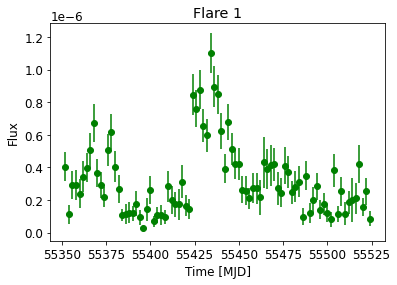

In [23]:
import matplotlib.pyplot as plt
plt.errorbar( tmax_mjd , flux , yerr = flux_err ,fmt = 'o', color = 'g')
plt.xlabel('Time [MJD]')
plt.ylabel('Flux')
plt.title('Flare 1')
plt.savefig('Lightcurve.png')
plt.show()
plt.show()

In [25]:
lc_data = [flux, tmax_mjd, tmin_mjd, Npred, ts, flux_err, flux_ul95]

In [26]:
type(lc_data)

list

In [30]:
np.savetxt("flux.txt",lc_data[0],delimiter='\n')

In [32]:
np.savetxt("tmax.txt",lc_data[1],delimiter='\n')
np.savetxt("tmin.txt",lc_data[2],delimiter='\n')
np.savetxt("npred.txt",lc_data[3],delimiter='\n')
np.savetxt("ts.txt",lc_data[4],delimiter='\n')
np.savetxt("flux_err.txt",lc_data[5],delimiter='\n')
np.savetxt("flux_ul95.txt",lc_data[6],delimiter='\n')